# Dense Neural Networks

This Notebook has a dense network with 1 dense hidden layer with 30 nodes.

The model isn't very accurate but it has a nice visualization of how the 5 nodes activate at the bottom and trains fast.

In [1]:
# A lot of code here is simplified and sourced from https://nextjournal.com/gkoehler/digit-recognition-with-keras

We use Numpy to work with our data and matplotlib to display graphs

In [2]:
%matplotlib inline
# %matplotlib ipympl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=8,8

import numpy as np
from keras.utils import np_utils

Keras is an api layer above tensorflow that allows us to easily specify neural networks with some predefined layers

In [3]:
from keras.datasets import mnist

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation

import tensorflow as tf

We load training data and testing data. Normally we would then split our training data into training and validation data. mnist is a data sample of hand drawn digits.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

To take a look at the data we look at the first 9 digits and their lables

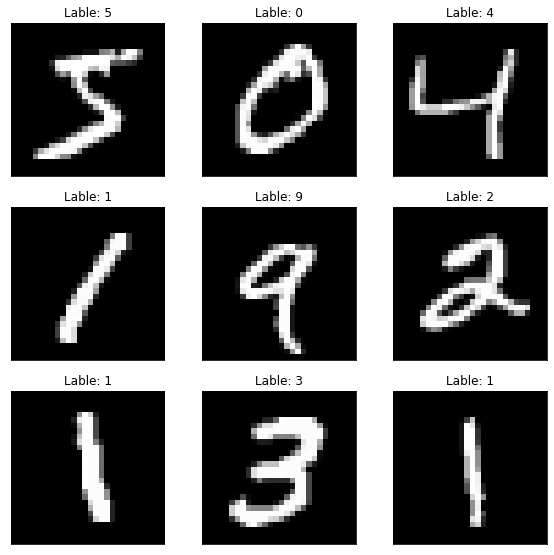

In [5]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Lable: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

We have 60000 samples and each sample is 28*28 pixels

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# Reshape into input vector instead of input matrix

X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

The pixels are now flattened into a vector so we can input them into the network as an input layer

In [8]:
X_train_flat.shape

(60000, 784)

In [9]:
# 255 Channels so a range of 255 for black to white
np.amax(X_train) - np.amin(X_train)

255.0

In [10]:
# We normalise to get x between 0 and 1
X_train_norm = X_train_flat / 255
X_test_norm = X_test_flat / 255
np.amax(X_train_norm) - np.amin(X_train_norm)

1.0

Text(0, 0.5, 'Density')

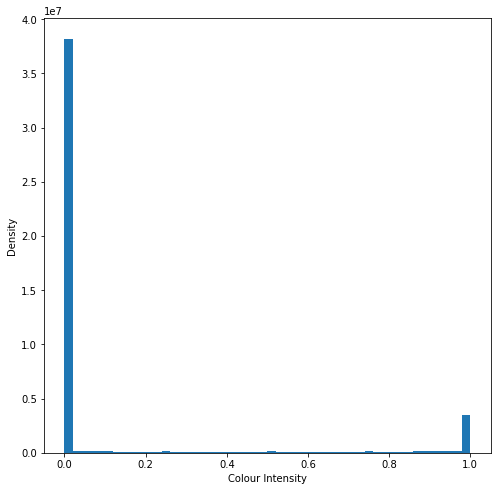

In [11]:
# Distribution of Pixel Values
plt.hist(X_train_norm.flatten(), bins = (50))
plt.xlabel('Colour Intensity')
plt.ylabel('Density')

We want to have 10 different catagories (0 to 9) and our output will be a probability of each digit being the correct number (with a probability of 1 for the lable)

In [12]:
# Training values into catogories

n_classes = 10
print(y_train[2])
y_train_norm = np_utils.to_categorical(y_train, n_classes)
y_test_norm = np_utils.to_categorical(y_test, n_classes)
print(y_train_norm[2])
print([0,1,2,3,4,5,6,7,8,9])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# The model

This is the part we're particularly interested in.
Here we can add layers and customise our network architecture.

In [13]:
model = Sequential()

# We specify we expect 784 input nodes (the number of pixels)
# Add a 5 node hidden layer
model.add(Dense(30, activation="relu", input_shape=(784,), name="1"))

# Convert from 10 numbers into relative probability (So total probability of each digit = 1)
model.add(Dense(10, activation="softmax", name="classification"))

We "compile" our model (setup with tensorflow).

We define what metrics we're interested in seeing, how to calculate our loss values and what optimization algorithm should be used to adjust our weights.

In [14]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Training
Here we train our network on the training data. We use 10 "epochs" or passes and make progressively smaller adjustments to our weights with each pass.

We train in batches to reduce our training time. Interestingly batch based training actually improves accuracy and nobody has proven (or fully understands) why.

In [15]:
history = model.fit(X_train_norm, y_train_norm,
          batch_size=64, epochs=10,
          verbose=2,
          validation_data=(X_test_norm, y_test_norm))

Epoch 1/10
938/938 - 3s - loss: 0.4275 - accuracy: 0.8801 - val_loss: 0.2479 - val_accuracy: 0.9298
Epoch 2/10
938/938 - 3s - loss: 0.2228 - accuracy: 0.9373 - val_loss: 0.1912 - val_accuracy: 0.9442
Epoch 3/10
938/938 - 3s - loss: 0.1754 - accuracy: 0.9506 - val_loss: 0.1622 - val_accuracy: 0.9542
Epoch 4/10
938/938 - 3s - loss: 0.1477 - accuracy: 0.9574 - val_loss: 0.1479 - val_accuracy: 0.9563
Epoch 5/10
938/938 - 3s - loss: 0.1295 - accuracy: 0.9625 - val_loss: 0.1360 - val_accuracy: 0.9594
Epoch 6/10
938/938 - 3s - loss: 0.1160 - accuracy: 0.9662 - val_loss: 0.1336 - val_accuracy: 0.9597
Epoch 7/10
938/938 - 3s - loss: 0.1052 - accuracy: 0.9691 - val_loss: 0.1213 - val_accuracy: 0.9626
Epoch 8/10
938/938 - 3s - loss: 0.0959 - accuracy: 0.9721 - val_loss: 0.1142 - val_accuracy: 0.9653
Epoch 9/10
938/938 - 3s - loss: 0.0888 - accuracy: 0.9735 - val_loss: 0.1128 - val_accuracy: 0.9648
Epoch 10/10
938/938 - 3s - loss: 0.0828 - accuracy: 0.9750 - val_loss: 0.1096 - val_accuracy: 0.9687

Training Accuracy gives a good indication of how good our model is performing. It's important to note that by training too much or with too much memorisation can lead to models "overfitting" and having high training accuracy and low test accuracy.

In [16]:
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])

Training Loss: 0.08281349390745163
Training Accuracy: 0.9750499725341797


Our test accuracy gives a better indication of how our model will perform in the real world.

Knowing how to properly prevent leakage between this and training accuracy is one of the most important skills in machine learning.

In [17]:
print("Test Accuracy:", model.evaluate(X_test_norm, y_test_norm)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9687
Test Accuracy: 0.9686999917030334


# How did we perform?

Here we look at some samples from the test data and take a look at what our model thinks each digit is.

Looking at where we succeed and fail gives us a good indication of weaknesses and strengths of our model.

A notable weakness is our model doesn't understand that digits can be drawn in different parts of the image. Our model is entirely based on absolute pixels rather than relative. We could adjust for this by scaling around the digits but this is a weak solution. We need an improved way to learn to "see"

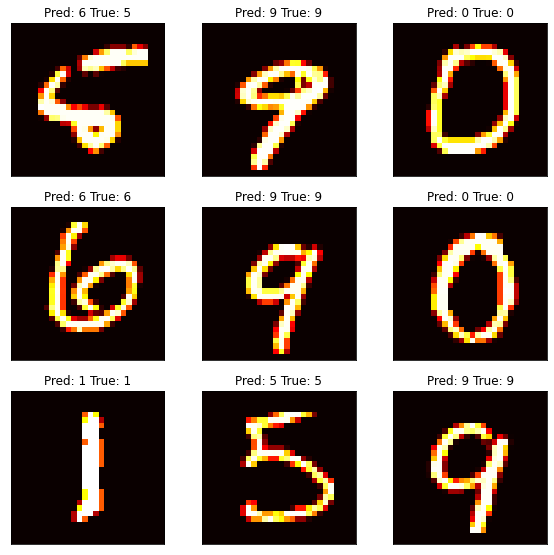

In [18]:
y_pred = model.predict(X_test_norm)


fig = plt.figure()
for i in range(8,17):
  plt.subplot(3,3,i+1 - 8)
  plt.tight_layout()
  plt.imshow(X_test[i], cmap='hot', interpolation='none')
  plt.title("Pred: {} True: {}".format(np.argmax(y_pred[i]), y_test[i]))
  plt.xticks([])
  plt.yticks([])

# What's in our neurons?

High pixels in green areas increase activation, high pixels in red areas decrease activation and yellow areas mostly ignore pixel values.

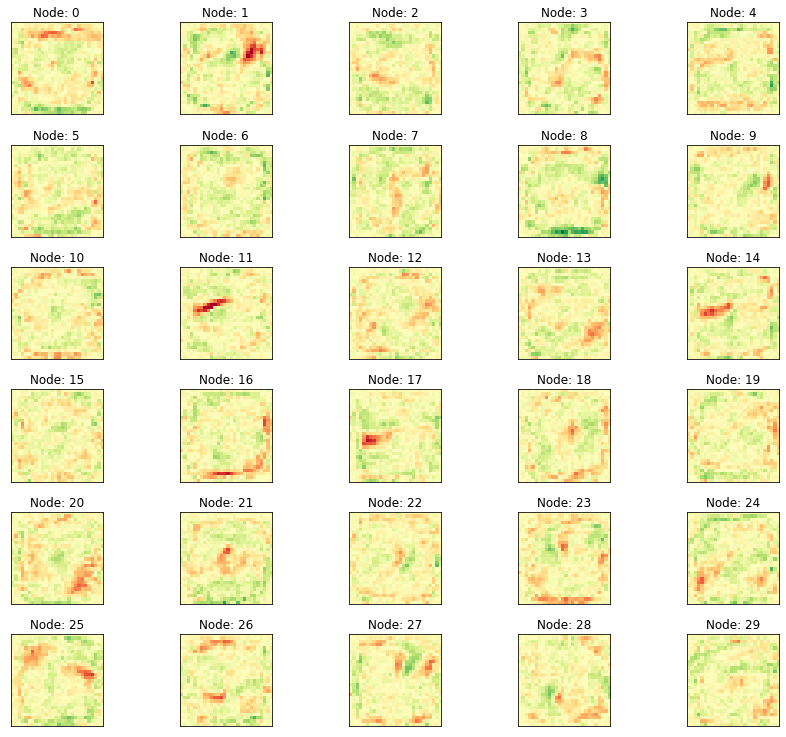

In [22]:

plt.rcParams["figure.figsize"]=12,12

activations = np.swapaxes(np.asarray(model.get_layer("1").get_weights()[0]), 0, 1)

fig = plt.figure()
for i in range(0,activations.shape[0]):
  plt.subplot(int(activations.shape[0]/5) + 1,5,i+1)
  plt.tight_layout()
  plt.imshow(activations[i].reshape(28,28), cmap='RdYlGn', interpolation='none', vmin=-1, vmax=1)
  plt.title("Node: {}".format(i))
  plt.xticks([])
  plt.yticks([])

In [23]:

plt.rcParams["figure.figsize"]=8,8

Here we can see the how each node (from left to right) effects each digit. Higher numbers increase the effect of a neuron activation.

In [24]:
for digit, weights in enumerate(activations):
    print(digit, weights)

0 [-6.90425634e-02 -7.59465545e-02  7.57635385e-03  1.76632851e-02
  5.41441515e-02 -8.27907622e-02  5.93099669e-02 -3.44943739e-02
 -2.59131417e-02 -7.65439346e-02  5.20646200e-02  4.86166701e-02
  2.41524130e-02 -1.98610798e-02  7.13127032e-02 -7.32265115e-02
  1.06915757e-02 -2.77739242e-02 -4.08404171e-02  5.77493533e-02
  3.40934396e-02 -3.73091511e-02 -2.43871734e-02  1.18798018e-03
 -3.49764675e-02  2.73543224e-02 -4.69114520e-02  4.79487404e-02
 -3.45238075e-02  5.32193407e-02  9.83530283e-03 -1.00506619e-02
 -7.36443847e-02 -8.96914974e-02 -3.86266001e-02 -1.52745098e-01
 -9.29092243e-02 -9.33940187e-02 -4.59935777e-02 -1.50840476e-01
 -1.58895865e-01 -4.71259691e-02  4.80774641e-02 -1.51827767e-01
 -2.20174715e-01 -3.11861992e-01 -9.52098444e-02 -8.08225423e-02
 -2.81476706e-01 -1.44513041e-01 -1.87448263e-01 -1.92362621e-01
 -7.70811886e-02 -4.23502140e-02 -3.53511162e-02 -3.70957702e-03
  6.60818592e-02  5.68759367e-02  7.06939921e-02 -2.51827806e-01
 -1.45674914e-01 -1.917

9 [ 7.48206154e-02  3.42520326e-02  5.36041781e-02 -2.88104489e-02
 -2.16439962e-02  3.12063470e-02 -4.74557541e-02 -3.12817544e-02
  6.80863783e-02  7.69063607e-02 -6.22824207e-02  4.76585701e-02
 -3.78287993e-02 -9.28612724e-02  1.41320109e-01  9.58031490e-02
 -2.09050775e-02 -6.53712600e-02  7.72459060e-03  5.70434555e-02
  6.90663606e-03  7.71795958e-03 -4.67818640e-02  3.76835167e-02
 -8.58025774e-02 -6.47696853e-03 -6.96246624e-02 -6.86739907e-02
 -4.98274527e-02 -7.05748498e-02  9.80928540e-03  8.35932046e-03
 -3.79993138e-03 -8.26687664e-02 -1.46857843e-01 -1.68877363e-01
 -1.53026238e-01 -1.40606552e-01 -2.35568538e-01 -2.11955741e-01
 -3.31151456e-01 -2.25344628e-01  7.04884976e-02 -1.96518451e-01
 -6.66223988e-02 -2.75801033e-01 -3.61200243e-01 -1.84748292e-01
 -3.38294655e-01 -1.16012745e-01 -1.11616559e-01 -1.21577322e-01
  5.26193902e-02  5.00851944e-02  8.10165629e-02 -3.80446762e-03
  1.30718946e-02  1.41573846e-02  3.37874517e-02 -2.39503607e-01
 -3.05976748e-01 -8.961

24 [ 6.99805394e-02  7.98693523e-02  8.27289894e-02  3.08583826e-02
 -5.14977686e-02 -1.36790797e-02 -5.45128398e-02 -1.55107528e-02
  3.22435051e-02 -3.52250673e-02  6.40272349e-03  7.30436817e-02
  4.50861380e-02  5.48544228e-02  5.07438974e-03  6.05490953e-02
  2.26785764e-02 -4.73314524e-03  4.17737290e-02  4.71961871e-02
 -7.56211728e-02 -8.54100361e-02  2.47299969e-02 -1.47824511e-02
 -5.63175790e-02  3.97990569e-02 -7.48490095e-02  8.28365460e-02
 -1.64560080e-02  3.37360278e-02 -8.07822719e-02  6.21820167e-02
  8.07318762e-02  9.39335153e-02  1.94432303e-01  2.42376417e-01
  2.54615068e-01  2.69113332e-01  1.71682939e-01  5.99064529e-02
  1.98119566e-01  1.86770692e-01 -1.08414412e-01 -8.97617936e-02
  2.07622647e-01  3.79639387e-01  3.82283986e-01  4.09239799e-01
  3.77375335e-01  2.22600162e-01  2.58385092e-01  2.14832008e-01
  1.62799284e-02 -2.63811089e-02 -3.23603824e-02 -1.54987201e-02
 -3.52488719e-02 -6.87782764e-02  8.60290304e-02  4.73714955e-02
  1.99617445e-01  1.07